# Visual Analytics Coursework

## A Data-Driven Examination of Gender Inequality in U.S. Income Distribution

This notebook presents a comprehensive analysis of the "Adult" dataset from the UCI Machine Learning Repository. The primary objective is to investigate gender-based income inequality in the United States—specifically, to examine disparities in income levels between male and female individuals.

---

## 1. Project Setup and Data Loading

In this section, we import the necessary libraries, load the dataset, and perform an initial inspection.  
Our focus is on understanding how gender relates to income distribution and identifying demographic patterns that contribute to observed disparities between males and females.


In [ ]:
!pip install ucimlrepo

In [ ]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

# For better aesthetics
sns.set_theme(style="whitegrid")

In [ ]:
# Fetch dataset from the UCI repository
adult = fetch_ucirepo(id=2)

# Create the initial DataFrame by combining features (X) and targets (y)
df = pd.concat([adult.data.features, adult.data.targets], axis=1)

print("Data loaded successfully.")

Data loaded successfully.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


####  Checking Total Row count

In [ ]:
Total_rows = df.shape[0]
print(f"Total number of rows: {Total_rows}")

Total number of rows: 48842


## 2. Data Preprocessing and Feature Selection

This section outlines the data preprocessing steps necessary to prepare the dataset for analysis. These steps include identifying and handling missing values, converting data types to appropriate formats, and removing or transforming irrelevant or redundant columns. Proper preprocessing is crucial to ensure the accuracy and reliability of subsequent analyses and visualizations.

Feature selection is also a key component of this stage. By focusing on relevant variables—particularly those related to gender and income—we aim to streamline the dataset and enhance the clarity of the report. This process corresponds to the "Data Preparation and Abstraction" phase of the visual analytics workflow, where raw data is transformed into a structured and analysis-ready form.


In [ ]:
# Initial inspection of the DataFrame
print("First 5 rows of the raw dataset:")
display(df.head())

print("\nDataFrame Info:")
df.info()

First 5 rows of the raw dataset:


age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


To ensure the selection of relevant features for analyzing gender-based income disparity, supporting evidence from existing research and statistical reports was considered. Based on insights from the [Center for American Progress](https://www.americanprogress.org/article/quick-facts-gender-wage-gap/) and [Forbes](https://www.forbes.com/advisor/business/gender-pay-gap-statistics/), several factors were identified as significant contributors to the gender wage gap. These include differences in working hours, types of employment, occupational segregation, and demographic background.

Drawing from these findings, the following features were retained for analysis:

- **`sex`**: Central to the study, representing the gender of each individual.
- **`hours-per-week`**: Captures differences in workload, which is often cited as a factor in wage disparities.
- **`workclass`**: Chosen over `occupation` to provide a broader high-level view of employment sectors. A single workclass category may encompass multiple occupations, allowing for an aggregate analysis of income trends across various job types. This abstraction is useful for identifying structural patterns in employment and income distribution without the noise introduced by more granular occupational data.
- **`race`**: Included to account for intersectional disparities, as gender wage gaps can vary significantly across racial and ethnic groups.
- **`native-country`**: Offers additional context on the geographic background of individuals, which may influence employment opportunities and income levels.
- **`income`**: Used as the target variable, this binary feature indicates whether an individual earns more than 50,000 dollar or less than or equal to 50,000 dollar
- **'age'**
The selection of these features aligns with both the goals of this analysis and the broader patterns documented in national labor statistics and wage gap research. This targeted feature selection enables a focused and evidence-based examination of income inequality.

In [ ]:
# Define the list of columns based strictly on your selection
selected_columns = [
    'sex',
    'hours-per-week',
    'workclass',
    'race',
    'age',
    'income',
    'education',
    'marital-status',
]

# new DataFrame containing only these selected columns
df_selected = df[selected_columns].copy()

# Display the first few rows and columns of the new DataFrame to verify
print("New DataFrame 'df_selected' created with the following columns:")
print(df_selected.columns.tolist())

print("\nFirst 5 rows of the new DataFrame:")
display(df_selected.head())

New DataFrame 'df_selected' created with the following columns:
['sex', 'hours-per-week', 'workclass', 'race', 'age', 'income', 'education', 'marital-status']

First 5 rows of the new DataFrame:


sex  hours-per-week         workclass   race  age income  education  \
0    Male              40         State-gov  White   39  <=50K  Bachelors   
1    Male              13  Self-emp-not-inc  White   50  <=50K  Bachelors   
2    Male              40           Private  White   38  <=50K    HS-grad   
3    Male              40           Private  Black   53  <=50K       11th   
4  Female              40           Private  Black   28  <=50K  Bachelors   

       marital-status  
0       Never-married  
1  Married-civ-spouse  
2            Divorced  
3  Married-civ-spouse  
4  Married-civ-spouse

### Exploratory Data Analysis: Categorical Feature Distributions

To gain an initial understanding of the demographic and employment-related characteristics in the dataset, bar plots were generated for all selected categorical features: `sex`, `workclass`, `race`, `native-country`, and `income`. These visualizations help reveal the distribution and balance of data across key categories relevant to gender-based income analysis.


/tmp/ipython-input-8-2698874551.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_selected, x=col, order=order, palette='pastel')


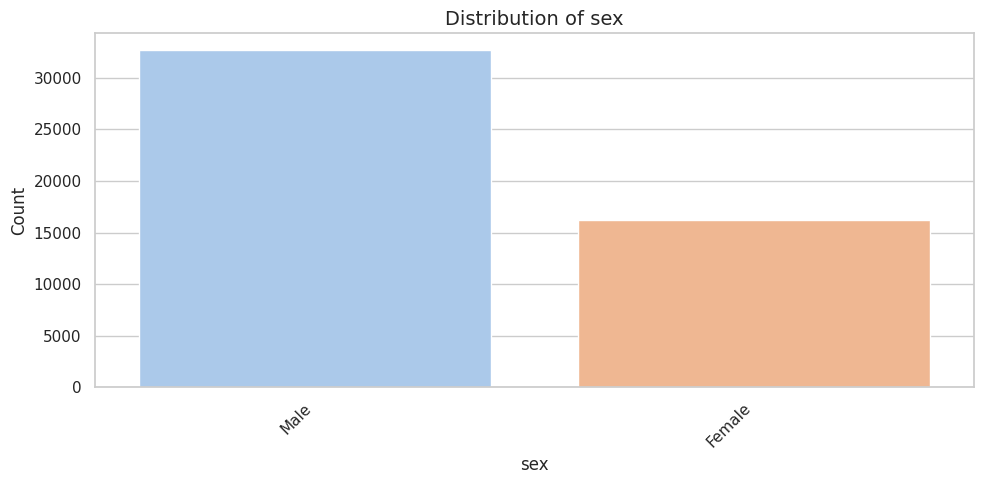

/tmp/ipython-input-8-2698874551.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_selected, x=col, order=order, palette='pastel')


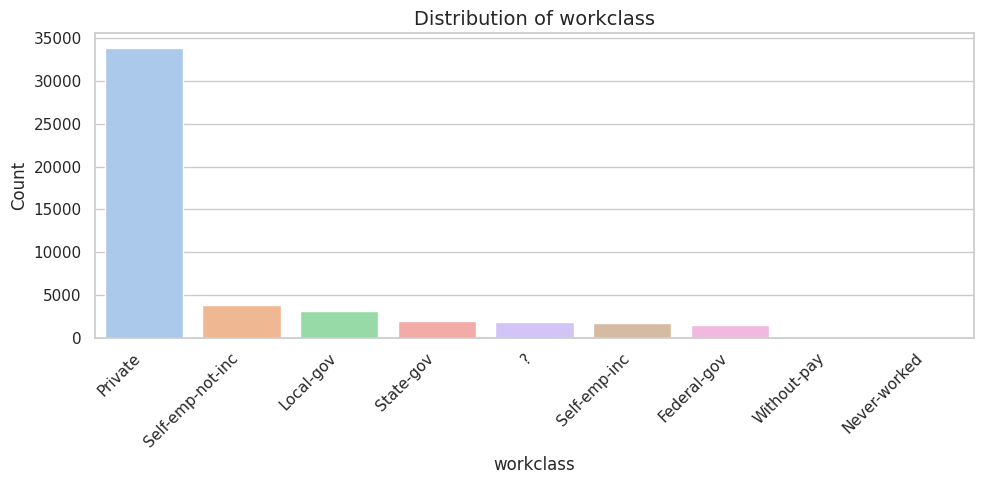

/tmp/ipython-input-8-2698874551.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_selected, x=col, order=order, palette='pastel')


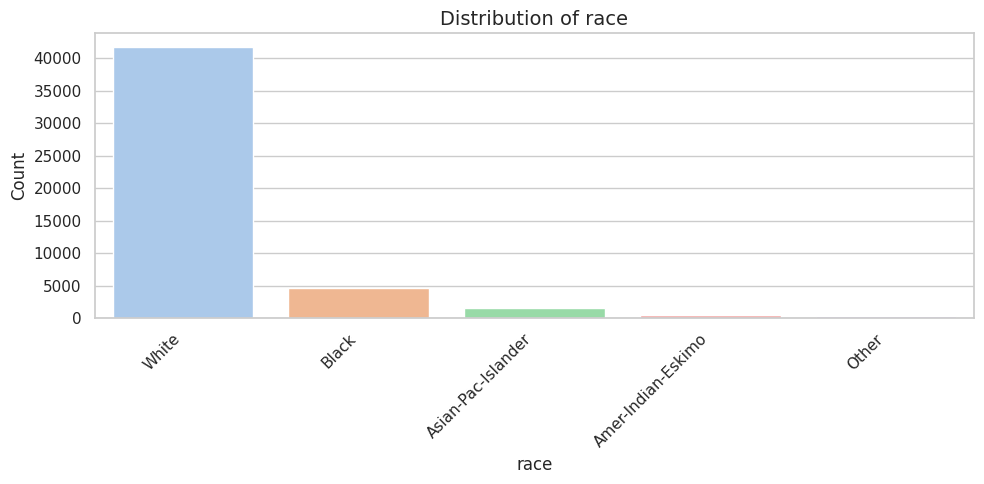

/tmp/ipython-input-8-2698874551.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_selected, x=col, order=order, palette='pastel')


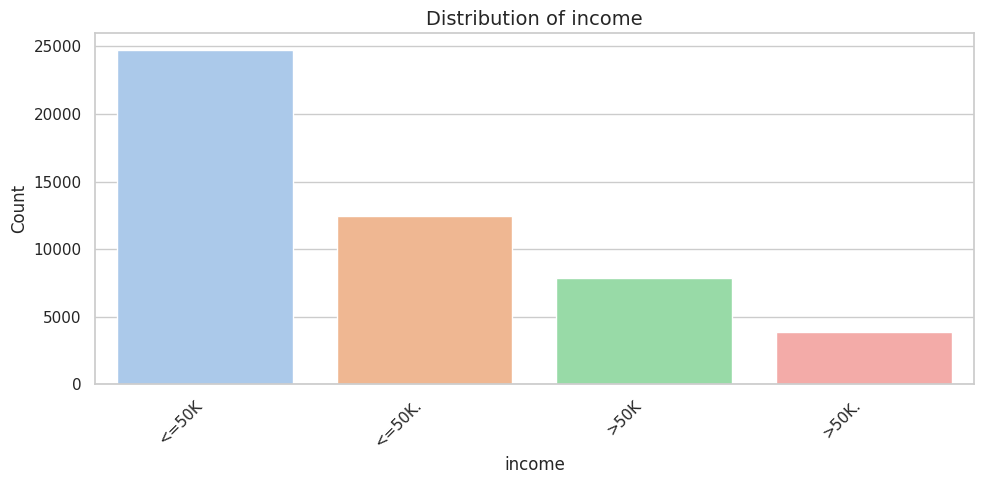

/tmp/ipython-input-8-2698874551.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_selected, x=col, order=order, palette='pastel')


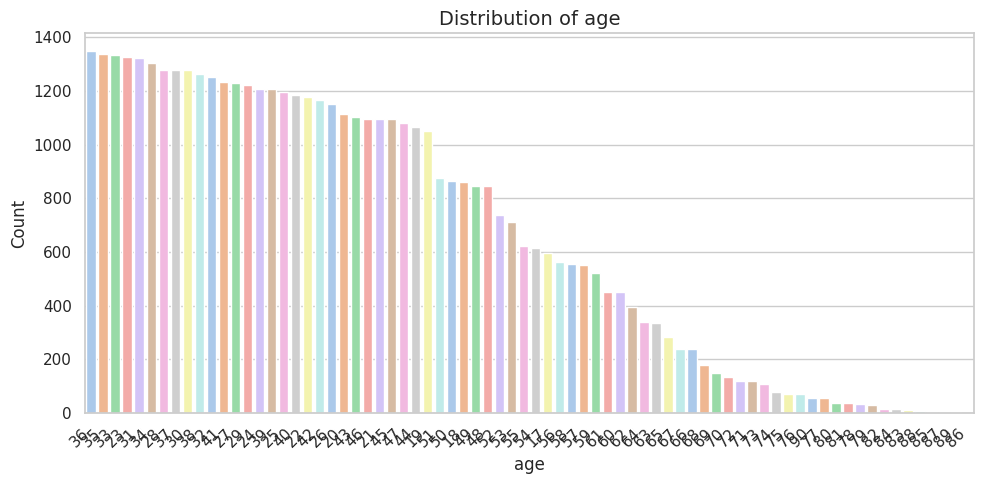

/tmp/ipython-input-8-2698874551.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_selected, x=col, order=order, palette='pastel')


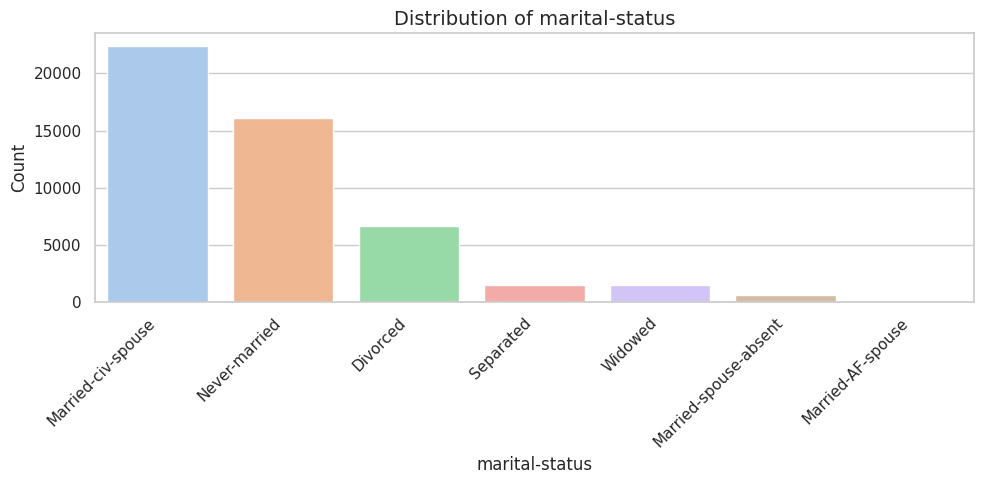

/tmp/ipython-input-8-2698874551.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_selected, x=col, order=order, palette='pastel')


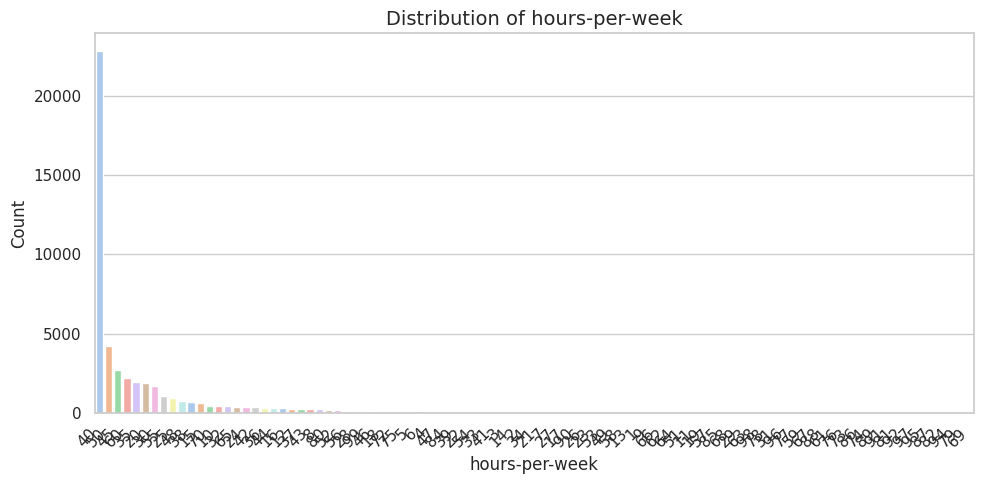

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns to plot
categorical_columns = ['sex', 'workclass', 'race', 'income','age','marital-status','hours-per-week']

# Set style
sns.set(style="whitegrid")

# Loop through each column and create a bar plot
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    order = df_selected[col].value_counts().index  # Order by frequency
    sns.countplot(data=df_selected, x=col, order=order, palette='pastel')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd

# List of categorical columns to summarize
categorical_columns = ['sex', 'workclass', 'race', 'income', 'age']

# Loop through each column and print value counts as a table
for col in categorical_columns:
    print(f"\nFrequency distribution for '{col}':")
    print(df_selected[col].value_counts().reset_index().rename(columns={'index': col, col: 'Count'}))



Frequency distribution for 'sex':
    Count  count
0    Male  32650
1  Female  16192

Frequency distribution for 'workclass':
              Count  count
0           Private  33906
1  Self-emp-not-inc   3862
2         Local-gov   3136
3         State-gov   1981
4                 ?   1836
5      Self-emp-inc   1695
6       Federal-gov   1432
7       Without-pay     21
8      Never-worked     10

Frequency distribution for 'race':
                Count  count
0               White  41762
1               Black   4685
2  Asian-Pac-Islander   1519
3  Amer-Indian-Eskimo    470
4               Other    406

Frequency distribution for 'income':
    Count  count
0   <=50K  24720
1  <=50K.  12435
2    >50K   7841
3   >50K.   3846

Frequency distribution for 'age':
    Count  count
0      36   1348
1      35   1337
2      33   1335
3      23   1329
4      31   1325
..    ...    ...
69     88      6
70     85      5
71     87      3
72     89      2
73     86      1

[74 rows x 2 columns]


### Data Cleaning: Handling Unknown and Ambiguous Categories

During data inspection, the columns `workclass` and `income` were found to contain ambiguous entries marked with `'?'` and trailing periods (e.g., `'>50K.'`). These anomalies were addressed as follows:

- In the `income` column, trailing periods were removed to standardize the labels to `'>50K'` and `'<=50K'`.
- In the `workclass` column, entries marked with `'?'`—which signify unknown or unreported employment types—were first replaced with `NaN`. Subsequently, a new category named `'Other'` was introduced to retain these records in the analysis.

This decision was made to avoid losing potentially valuable data. Deleting rows with missing `workclass` entries would have reduced the dataset size and might have introduced bias. Additionally, imputing the missing values using probabilistic or Bayesian methods was deemed inappropriate because it could incorrectly force unknown values into existing known categories without valid justification. Such assumptions require an external authoritative list of all possible `workclass` categories—which is not available in this context.

By introducing an `'Other'` category, the analysis remains inclusive of individuals with undefined employment classes, ensuring a more comprehensive and representative study of gender-based income disparities.

In [ ]:
# Replace '?' with NaN in a safe way
df_selected['workclass'] = df_selected['workclass'].replace('?', np.nan)

# Then fill NaN with 'Other'
df_selected['workclass'] = df_selected['workclass'].fillna('Other')
# Remove trailing period from income categories
df_selected['income'] = df_selected['income'].str.replace('.', '', regex=False)

# List of workclass categories to remove
classes_to_remove = ['Self-emp-not-inc', 'Self-emp-inc', 'Without-pay', 'Never-worked']

# Filter the DataFrame to keep only the rows that are NOT in the list
df_selected = df_selected[~df_selected['workclass'].isin(classes_to_remove)]

/tmp/ipython-input-11-840086166.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_selected, x=col, order=order, palette='pastel')


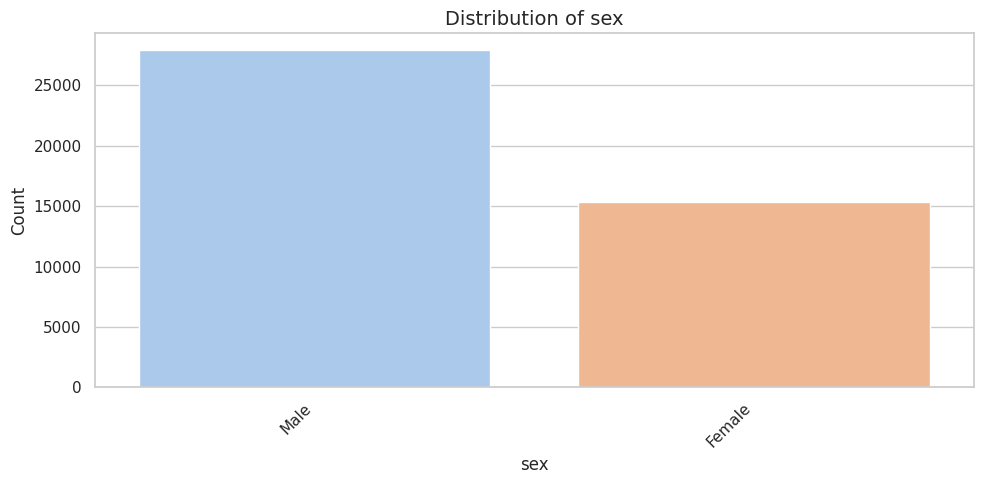

/tmp/ipython-input-11-840086166.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_selected, x=col, order=order, palette='pastel')


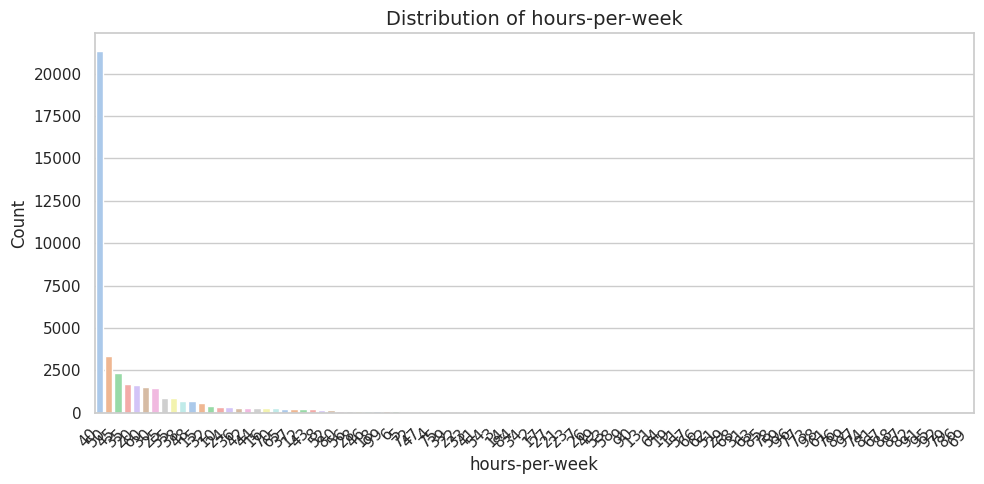

/tmp/ipython-input-11-840086166.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_selected, x=col, order=order, palette='pastel')


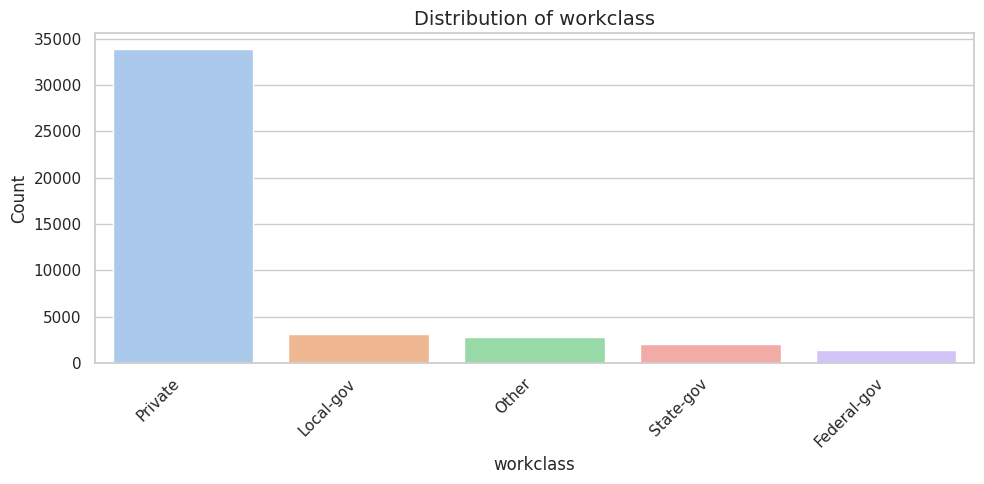

/tmp/ipython-input-11-840086166.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_selected, x=col, order=order, palette='pastel')


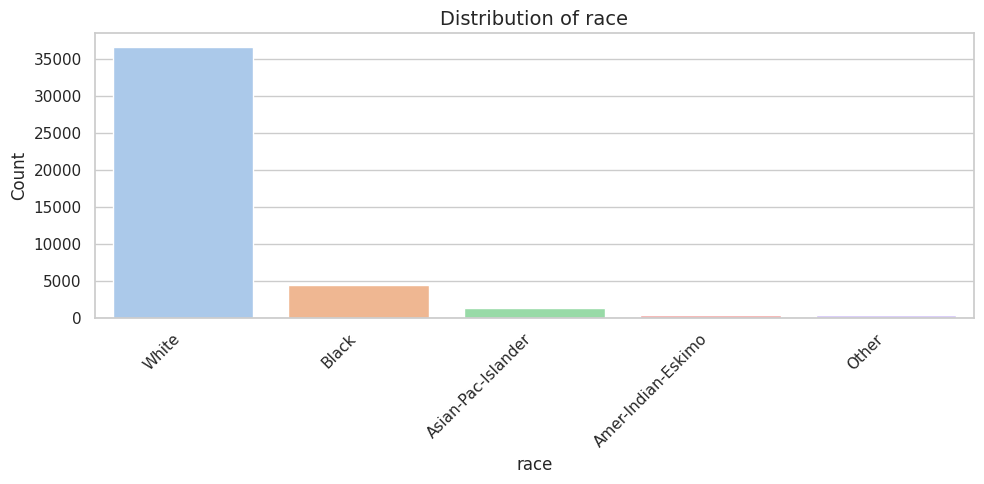

/tmp/ipython-input-11-840086166.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_selected, x=col, order=order, palette='pastel')


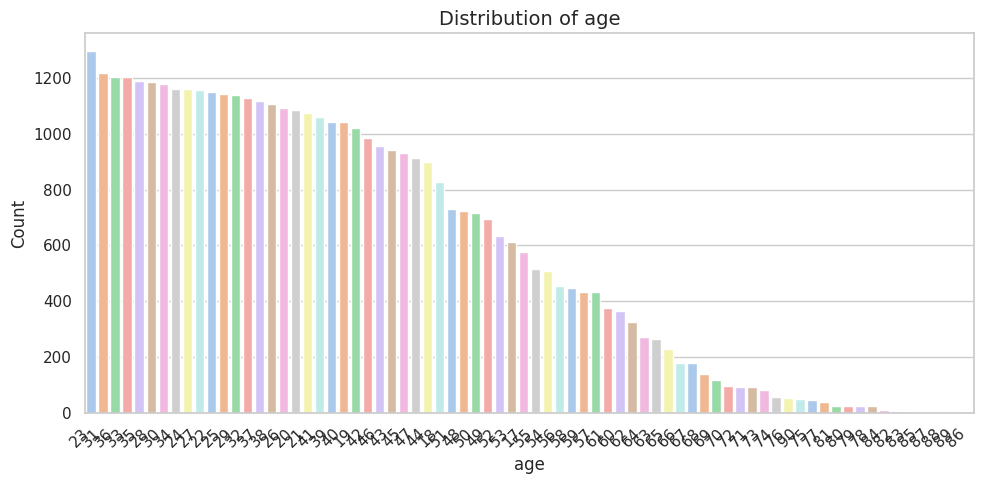

/tmp/ipython-input-11-840086166.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_selected, x=col, order=order, palette='pastel')


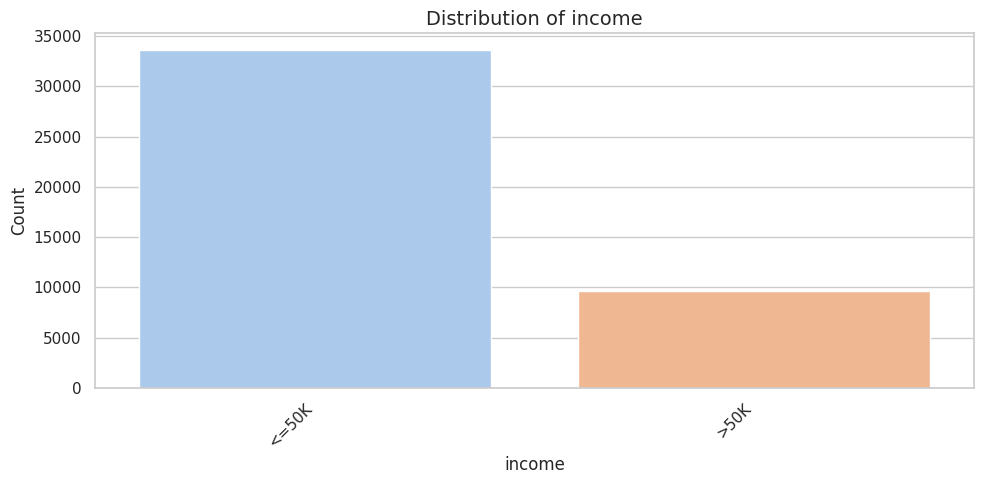

/tmp/ipython-input-11-840086166.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_selected, x=col, order=order, palette='pastel')


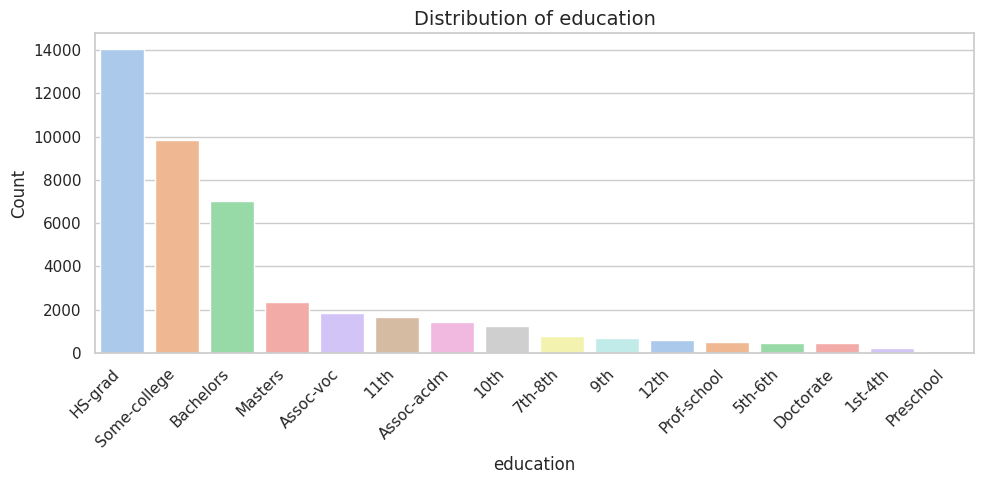

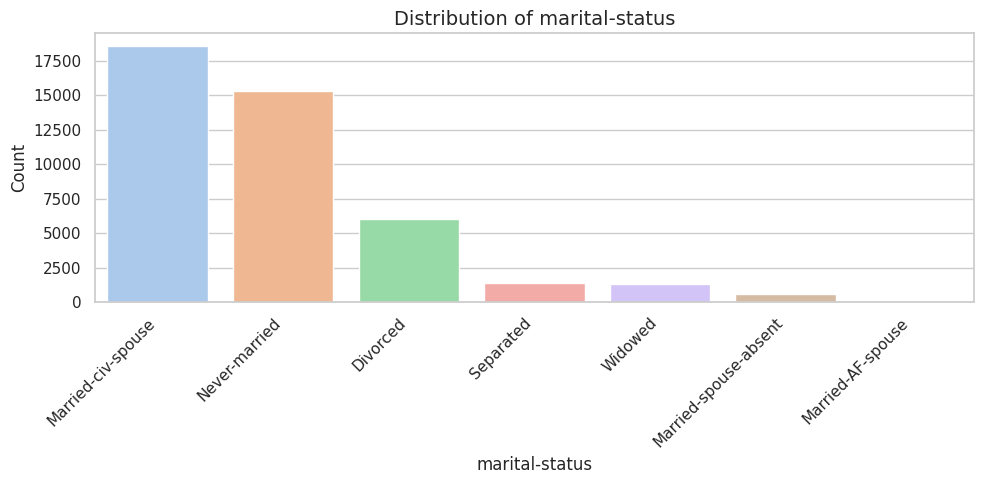

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns to plot
categorical_columns = [
    'sex',
    'hours-per-week',
    'workclass',
    'race',
    'age',
    'income',
    'education',
    'marital-status',
]


# Set style
sns.set(style="whitegrid")

# Loop through each column and create a bar plot
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    order = df_selected[col].value_counts().index  # Order by frequency
    sns.countplot(data=df_selected, x=col, order=order, palette='pastel')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


In [ ]:
df_selected.to_csv('female_adult_data.csv', index=False)

In [ ]:
import pandas as pd

# Check if df_selected exists and has the required columns
if 'df_selected' not in locals() and 'df_selected' not in globals():
    print("Error: 'df_selected' DataFrame is not defined. Please ensure it's loaded before running this script.")
elif 'age' not in df_selected.columns or 'hours-per-week' not in df_selected.columns:
    print("Error: 'df_selected' DataFrame must contain 'age' and 'hours-per-week' columns.")
else:
    try:
        # Create the 'age_bin' categorical column from the original 'age'
        min_age = df_selected['age'].min()
        max_age = df_selected['age'].max()
        bins = [i for i in range(5, int(max_age) + 11, 5)]
        if bins[-1] <= max_age:
            bins.append(int(max_age) + 1)
        labels = [f'{bins[i]}-{bins[i+1]-1}' if i == 0 else f'{bins[i]}s' if i < len(bins) - 2 else f'{bins[i]}s+' for i in range(len(bins) - 1)]
        df_selected['age_bin'] = pd.cut(df_selected['age'], bins=bins, labels=labels, right=False)

        # Create the average hours column for mapping
        avg_hours_map = df_selected.groupby('age_bin')['hours-per-week'].mean()
        df_selected['avg_weekly_hours_by_age_bin'] = df_selected['age_bin'].map(avg_hours_map)

        # Drop the specified columns to prepare for encoding
        df_temp = df_selected.drop(columns=['age', 'hours-per-week', 'native-country'], errors='ignore').copy()

        # Identify categorical columns for encoding (excluding 'sex')
        columns_to_encode = df_temp.select_dtypes(include=['object', 'category']).columns.tolist()
        if 'sex' in columns_to_encode:
            columns_to_encode.remove('sex')

        # Perform one-hot encoding and store in df_encoded
        df_encoded = pd.get_dummies(df_temp, columns=columns_to_encode, dtype=int, dummy_na=False)

        # Display results
        print("First few rows of the encoded DataFrame (showing top 6 columns):")
        print(df_encoded.iloc[:, :6].head().to_string())

        print("\nColumns in the encoded DataFrame:")
        print(df_encoded.columns.tolist())

    except Exception as e:
        print(f"An error occurred during processing: {e}")

First few rows of the encoded DataFrame (showing top 6 columns):
      sex  avg_weekly_hours_by_age_bin  workclass_Federal-gov  workclass_Local-gov  workclass_Other  workclass_Private
0    Male                    42.933027                      0                    0                0                  0
2    Male                    42.933027                      0                    0                0                  1
3    Male                    42.391495                      0                    0                0                  1
4  Female                    41.095854                      0                    0                0                  1
5  Female                    42.933027                      0                    0                0                  1

Columns in the encoded DataFrame:
['sex', 'avg_weekly_hours_by_age_bin', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Other', 'workclass_Private', 'workclass_State-gov', 'race_Amer-Indian-Eskimo', 'race_Asi

In [ ]:
df_selected.head()

sex  hours-per-week  workclass   race  age income  education  \
0    Male              40  State-gov  White   39  <=50K  Bachelors   
2    Male              40    Private  White   38  <=50K    HS-grad   
3    Male              40    Private  Black   53  <=50K       11th   
4  Female              40    Private  Black   28  <=50K  Bachelors   
5  Female              40    Private  White   37  <=50K    Masters   

       marital-status age_bin  avg_weekly_hours_by_age_bin  
0       Never-married     35s                    42.933027  
2            Divorced     35s                    42.933027  
3  Married-civ-spouse     50s                    42.391495  
4  Married-civ-spouse     25s                    41.095854  
5  Married-civ-spouse     35s                    42.933027

In [ ]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43254 entries, 0 to 48840
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   sex                          43254 non-null  object  
 1   hours-per-week               43254 non-null  int64   
 2   workclass                    43254 non-null  object  
 3   race                         43254 non-null  object  
 4   age                          43254 non-null  int64   
 5   income                       43254 non-null  object  
 6   education                    43254 non-null  object  
 7   marital-status               43254 non-null  object  
 8   age_bin                      43254 non-null  category
 9   avg_weekly_hours_by_age_bin  43254 non-null  float64 
dtypes: category(1), float64(1), int64(2), object(6)
memory usage: 3.3+ MB


In [ ]:
df_encoded.head()

sex  avg_weekly_hours_by_age_bin  workclass_Federal-gov  \
0    Male                    42.933027                      0   
2    Male                    42.933027                      0   
3    Male                    42.391495                      0   
4  Female                    41.095854                      0   
5  Female                    42.933027                      0   

   workclass_Local-gov  workclass_Other  workclass_Private  \
0                    0                0                  0   
2                    0                0                  1   
3                    0                0                  1   
4                    0                0                  1   
5                    0                0                  1   

   workclass_State-gov  race_Amer-Indian-Eskimo  race_Asian-Pac-Islander  \
0                    1                        0                        0   
2                    0                        0                        0   
3                    0                        0                        0   
4                    0                        0                        0   
5                    0                        0                        0   

   race_Black  ...  age_bin_50s  age_bin_55s  age_bin_60s  age_bin_65s  \
0           0  ...            0            0            0            0   
2           0  ...            0            0            0            0   
3           1  ...            1            0            0            0   
4           1  ...            0            0            0            0   
5           0  ...            0            0            0            0   

   age_bin_70s  age_bin_75s  age_bin_80s  age_bin_85s  age_bin_90s  \
0            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   
5            0            0            0            0            0   

   age_bin_95s+  
0             0  
2             0  
3             0  
4             0  
5             0  

[5 rows x 56 columns]

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43254 entries, 0 to 48840
Data columns (total 56 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   sex                                   43254 non-null  object 
 1   avg_weekly_hours_by_age_bin           43254 non-null  float64
 2   workclass_Federal-gov                 43254 non-null  int64  
 3   workclass_Local-gov                   43254 non-null  int64  
 4   workclass_Other                       43254 non-null  int64  
 5   workclass_Private                     43254 non-null  int64  
 6   workclass_State-gov                   43254 non-null  int64  
 7   race_Amer-Indian-Eskimo               43254 non-null  int64  
 8   race_Asian-Pac-Islander               43254 non-null  int64  
 9   race_Black                            43254 non-null  int64  
 10  race_Other                            43254 non-null  int64  
 11  race_White          

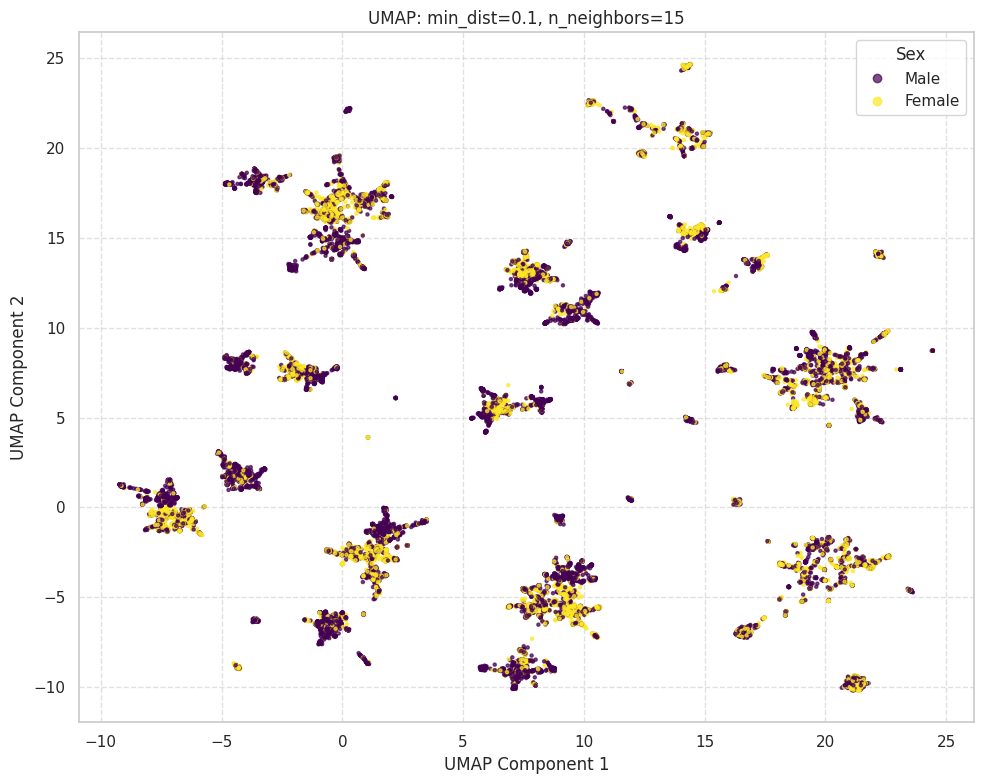

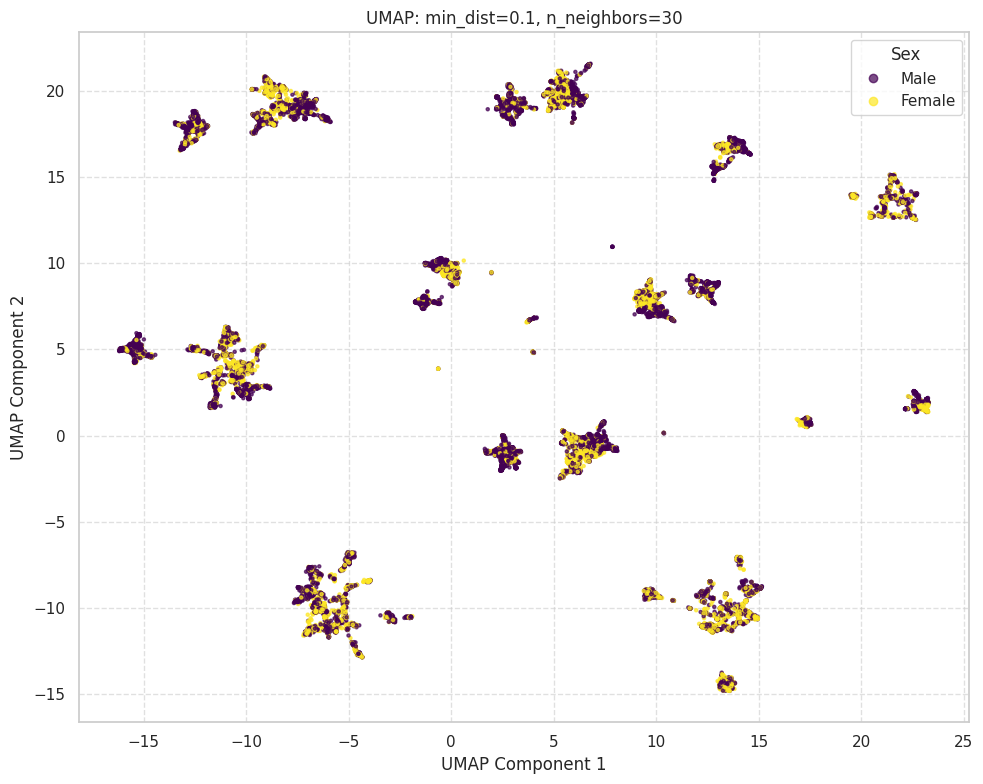

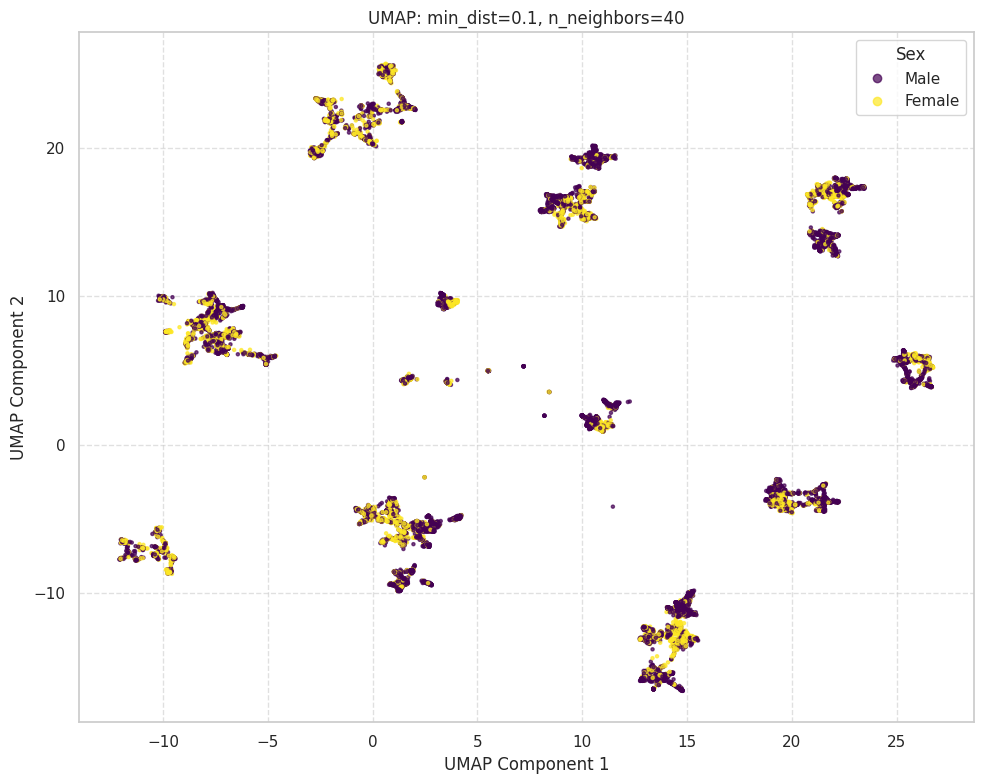

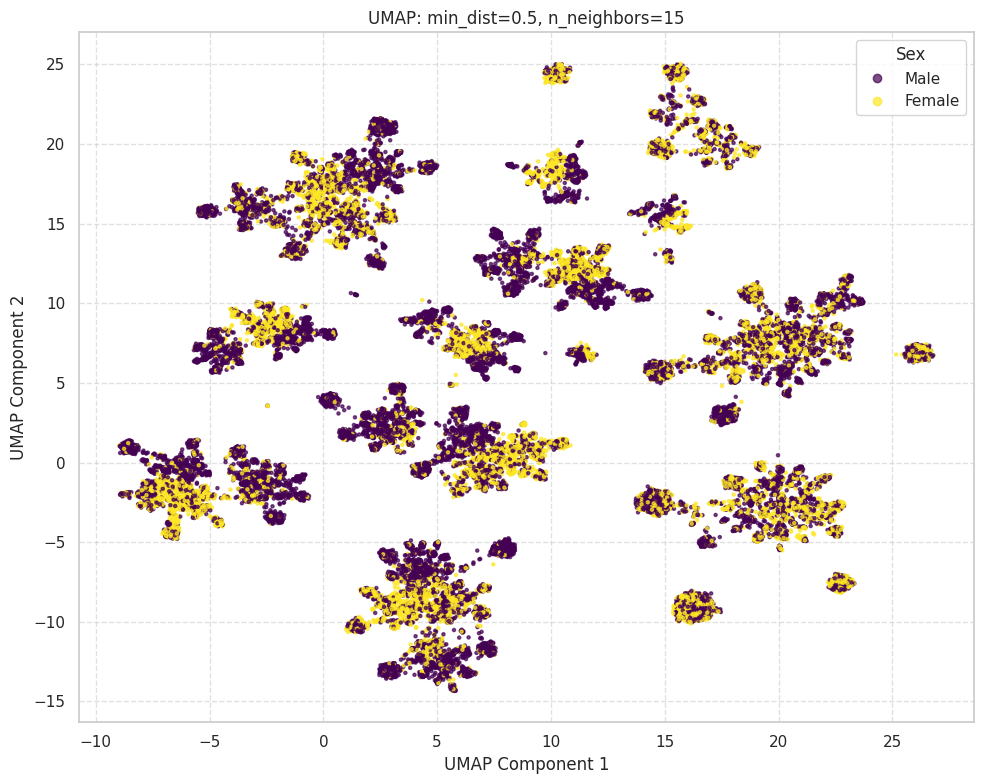

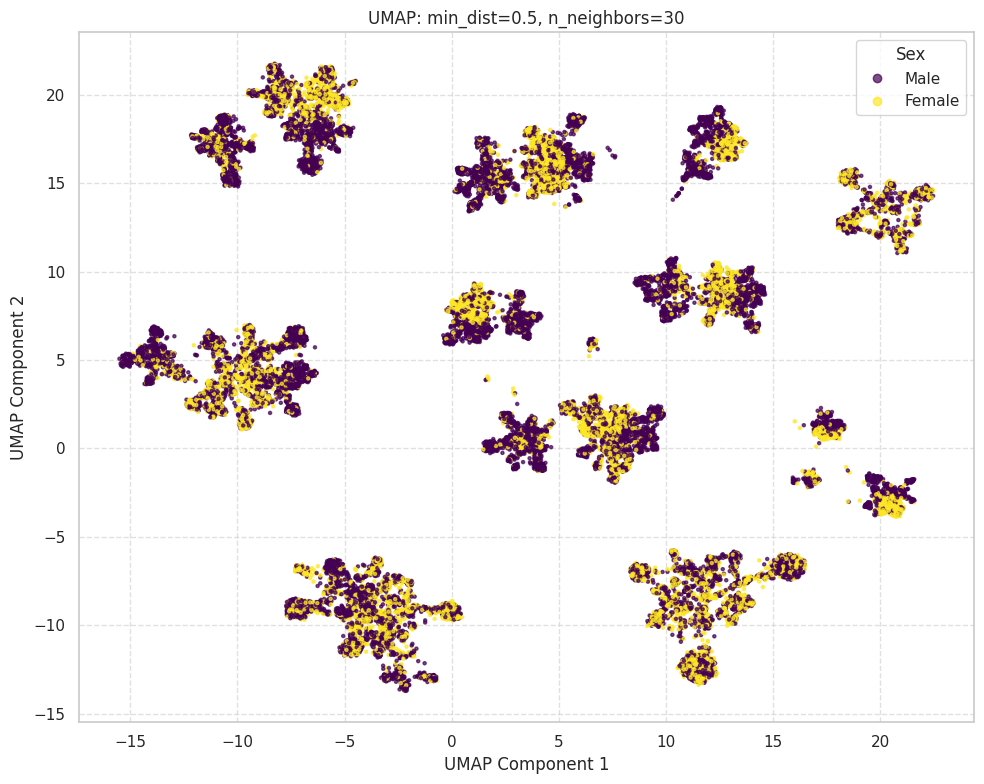

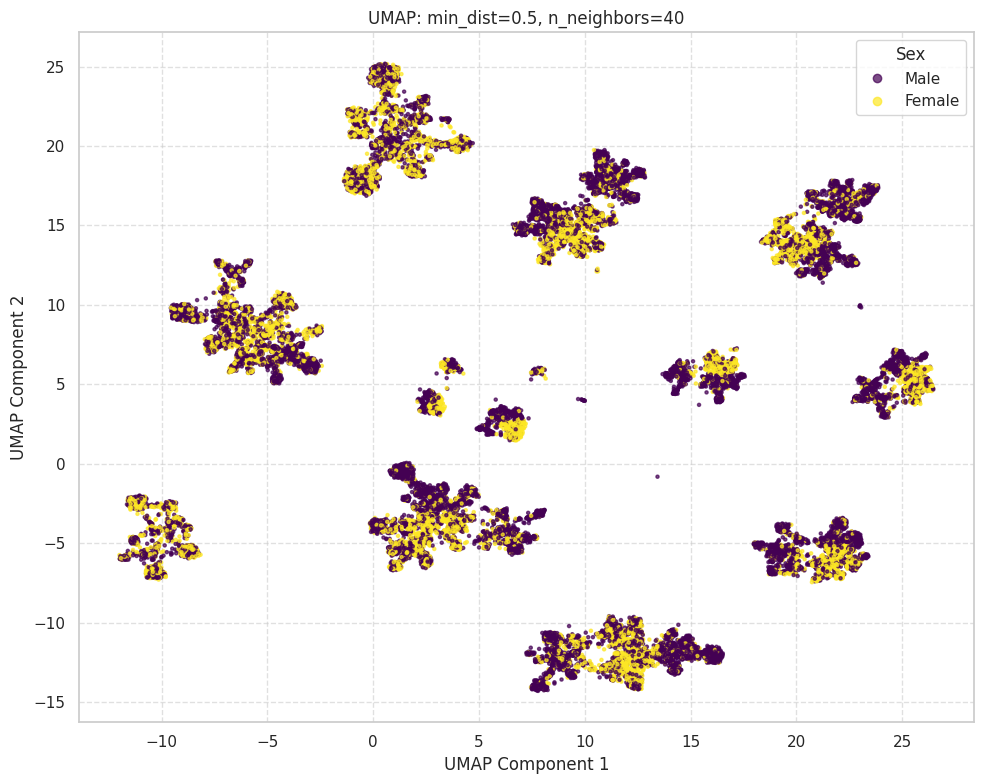

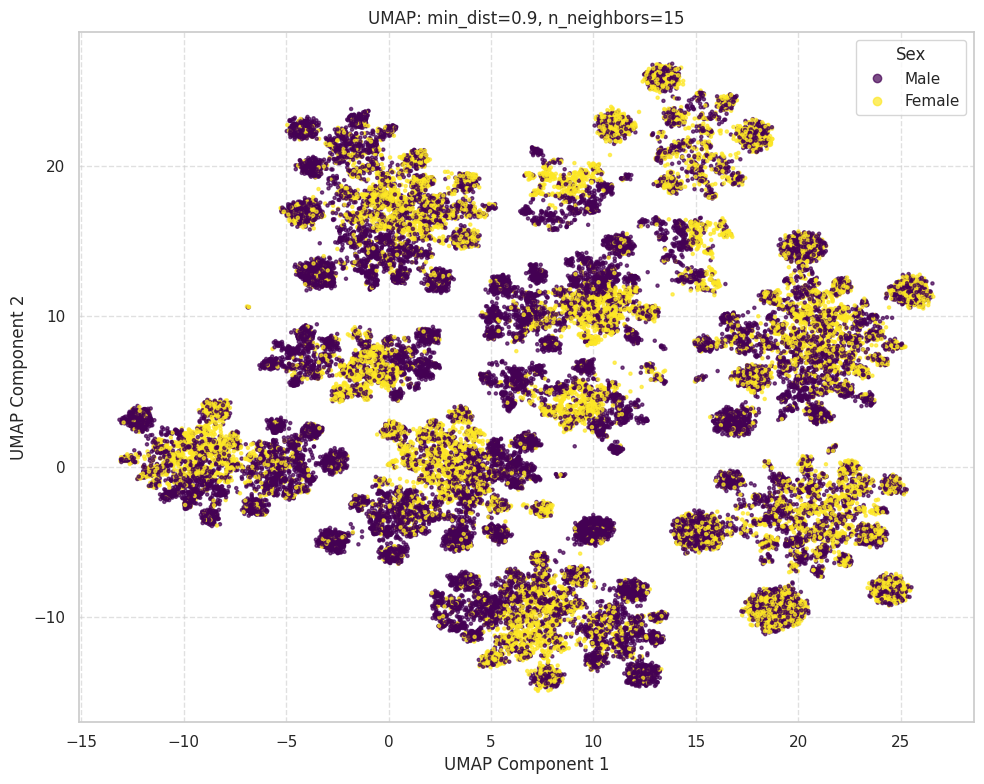

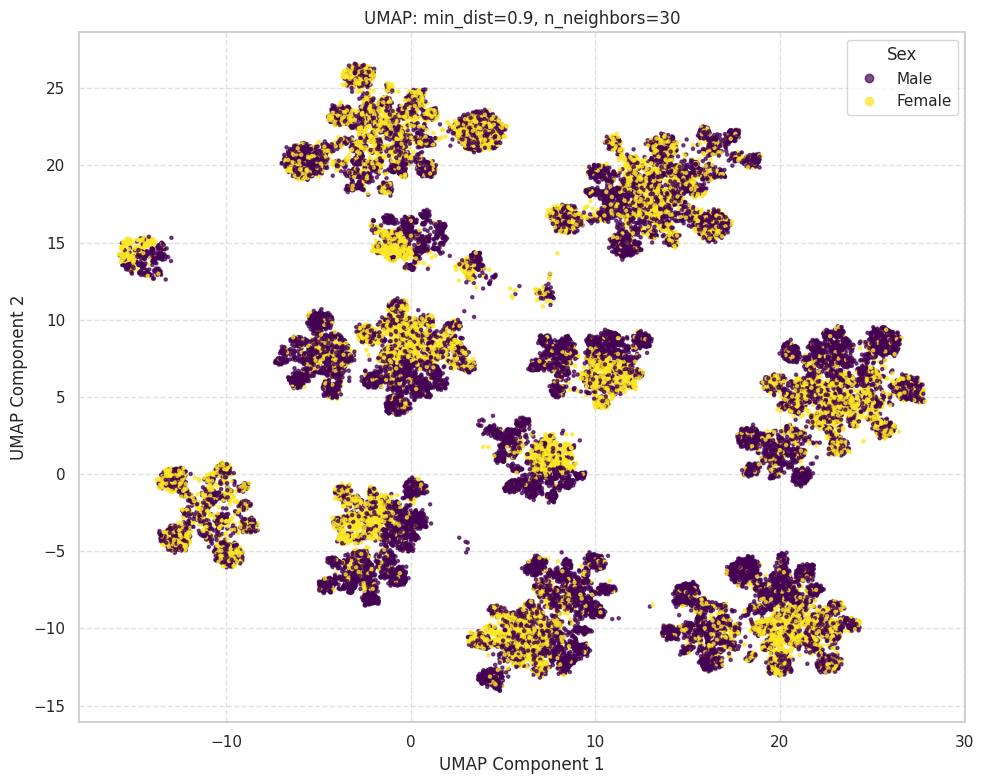

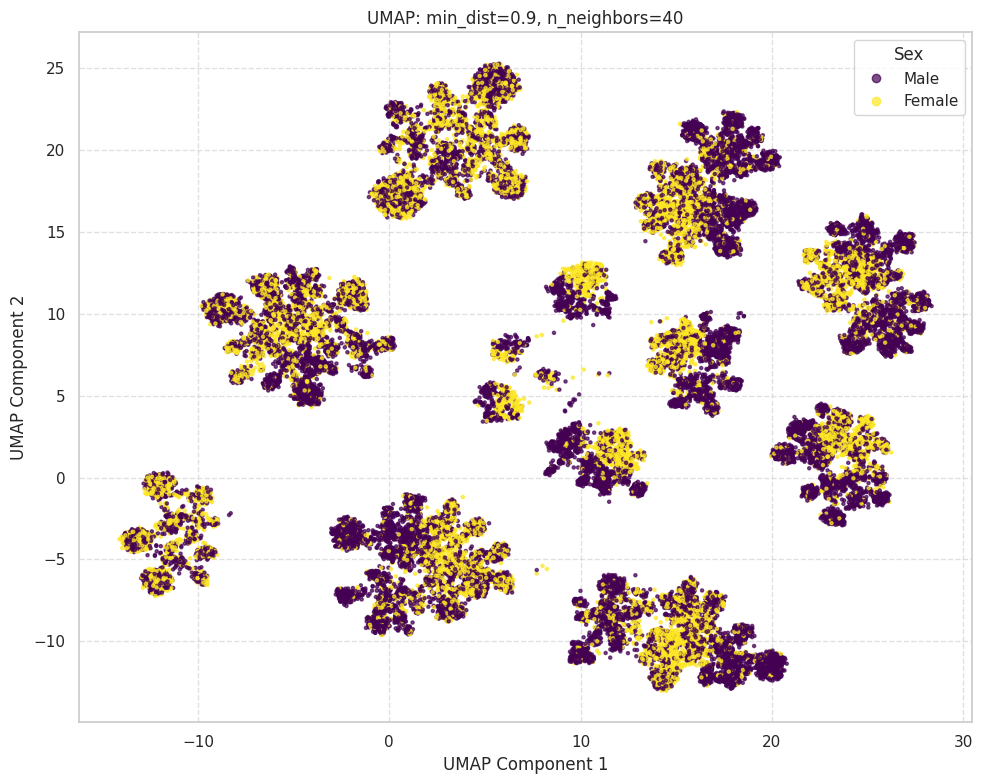

In [ ]:
import pandas as pd
import umap
import matplotlib.pyplot as plt

# --- 1. Assume you already have: ---
# df_selected  → original DataFrame (raw features + 'sex')
# df_encoded   → one-hot encoded DataFrame from df_selected

# --- 2. Prepare data for UMAP ---
X = df_encoded.drop('sex', axis=1)
y_labels = df_encoded['sex']
y_numeric, categories = pd.factorize(y_labels)

# --- 3. Copy df_selected to preserve original + add UMAP later ---
df_selected_umap = df_selected.copy()

# --- 4. UMAP parameter grid ---
min_dists = [0.1, 0.5, 0.9]
n_neighbors_list = [15, 30, 40]

# --- 5. Run UMAP for each combination ---
for min_dist in min_dists:
    for n_neighbors in n_neighbors_list:
        reducer = umap.UMAP(
            metric='hamming',
            n_neighbors=n_neighbors,
            min_dist=min_dist,
            random_state=42
        )

        # Fit UMAP on encoded data
        embedding = reducer.fit_transform(X)

        # Name columns for this configuration
        col1 = f'UMAP1_min{min_dist}_n{n_neighbors}'
        col2 = f'UMAP2_min{min_dist}_n{n_neighbors}'

        # Create UMAP DataFrame and attach to original df_selected copy
        df_umap = pd.DataFrame(embedding, columns=[col1, col2], index=df_selected_umap.index)
        df_selected_umap = pd.concat([df_selected_umap, df_umap], axis=1)

        # --- Plotting ---
        fig, ax = plt.subplots(figsize=(10, 8))
        scatter = ax.scatter(
            embedding[:, 0],
            embedding[:, 1],
            c=y_numeric,
            cmap='viridis',
            s=5,
            alpha=0.7
        )
        ax.set_title(f'UMAP: min_dist={min_dist}, n_neighbors={n_neighbors}')
        ax.set_xlabel('UMAP Component 1')
        ax.set_ylabel('UMAP Component 2')
        ax.grid(True, linestyle='--', alpha=0.6)
        ax.legend(handles=scatter.legend_elements()[0], labels=list(categories), title="Sex")
        plt.tight_layout()
        plt.show()


In [ ]:
df_selected_umap.head()

sex  hours-per-week  workclass   race  age income  education  \
0    Male              40  State-gov  White   39  <=50K  Bachelors   
2    Male              40    Private  White   38  <=50K    HS-grad   
3    Male              40    Private  Black   53  <=50K       11th   
4  Female              40    Private  Black   28  <=50K  Bachelors   
5  Female              40    Private  White   37  <=50K    Masters   

       marital-status age_bin  avg_weekly_hours_by_age_bin  ...  \
0       Never-married     35s                    42.933027  ...   
2            Divorced     35s                    42.933027  ...   
3  Married-civ-spouse     50s                    42.391495  ...   
4  Married-civ-spouse     25s                    41.095854  ...   
5  Married-civ-spouse     35s                    42.933027  ...   

   UMAP1_min0.5_n30  UMAP2_min0.5_n30  UMAP1_min0.5_n40  UMAP2_min0.5_n40  \
0         -8.176208         19.364119         11.398496        -11.267975   
2         -6.044413         21.443378         12.221444        -13.850854   
3         13.943746          8.595105         21.992426         -5.000394   
4         -3.899258         -8.059000         -4.568582          7.125233   
5         -6.230802         17.564457         14.939634        -11.507061   

   UMAP1_min0.9_n15  UMAP2_min0.9_n15  UMAP1_min0.9_n30  UMAP2_min0.9_n30  \
0          7.304968         -8.835894         22.170477         -9.489513   
2          7.403503        -13.882677         20.153746        -12.683798   
3          9.944112         12.149563         -0.215028         -2.513318   
4         20.084019          7.255227         11.665253         17.461330   
5          4.452415         -9.024577         19.630075         -7.139177   

   UMAP1_min0.9_n40  UMAP2_min0.9_n40  
0         14.983799         -8.554987  
2         14.140149        -12.033706  
3         22.287594          2.229006  
4         -4.397657          7.528595  
5         18.360361        -11.790099  

[5 rows x 28 columns]

In [ ]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43254 entries, 0 to 48840
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   sex                          43254 non-null  object  
 1   hours-per-week               43254 non-null  int64   
 2   workclass                    43254 non-null  object  
 3   race                         43254 non-null  object  
 4   age                          43254 non-null  int64   
 5   income                       43254 non-null  object  
 6   education                    43254 non-null  object  
 7   marital-status               43254 non-null  object  
 8   age_bin                      43254 non-null  category
 9   avg_weekly_hours_by_age_bin  43254 non-null  float64 
dtypes: category(1), float64(1), int64(2), object(6)
memory usage: 3.3+ MB


In [ ]:
columns_to_drop_before_encoding = ['age_bin', 'avg_weekly_hours_by_age_bin', 'native-country']
df_temp = df_selected.drop(columns=columns_to_drop_before_encoding, errors='ignore').copy()

# Identify columns to keep as they are (not one-hot encode): 'sex', 'age', 'hours-per-week'
columns_to_keep = ['sex', 'age', 'hours-per-week']

# Identify columns for one-hot encoding
# These are all columns in df_temp EXCEPT those in columns_to_keep
columns_to_encode = [col for col in df_temp.columns if col not in columns_to_keep]

# Perform one-hot encoding on the identified columns
df_encoded = pd.get_dummies(df_temp, columns=columns_to_encode, dtype=int, dummy_na=False)

# Display results
print("First few rows of the new encoded DataFrame:")
print(df_encoded.head().to_string())

print("\nColumns in the new encoded DataFrame:")
print(df_encoded.columns.tolist())

print("\nNew DataFrame Info:")
df_encoded.info()


First few rows of the new encoded DataFrame:
      sex  hours-per-week  age  workclass_Federal-gov  workclass_Local-gov  workclass_Other  workclass_Private  workclass_State-gov  race_Amer-Indian-Eskimo  race_Asian-Pac-Islander  race_Black  race_Other  race_White  income_<=50K  income_>50K  education_10th  education_11th  education_12th  education_1st-4th  education_5th-6th  education_7th-8th  education_9th  education_Assoc-acdm  education_Assoc-voc  education_Bachelors  education_Doctorate  education_HS-grad  education_Masters  education_Preschool  education_Prof-school  education_Some-college  marital-status_Divorced  marital-status_Married-AF-spouse  marital-status_Married-civ-spouse  marital-status_Married-spouse-absent  marital-status_Never-married  marital-status_Separated  marital-status_Widowed
0    Male              40   39                      0                    0                0                  0                    1                        0                        0      

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# --- Step 1: Prepare data for PCA ---
X = df_encoded.drop('sex', axis=1)

# --- Step 2: Scale the features (important for PCA) ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Step 3: Run PCA ---
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(X_scaled)

# --- Step 4: Create PCA DataFrame ---
df_pca = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'], index=df_selected_umap.index)

# --- Step 5: Append to df_selected_umap ---
df_selected_umap = pd.concat([df_selected_umap, df_pca], axis=1)

# Optional: Preview final DataFrame
print(df_selected_umap.head())


      sex  hours-per-week  workclass   race  age income  education  \
0    Male              40  State-gov  White   39  <=50K  Bachelors   
2    Male              40    Private  White   38  <=50K    HS-grad   
3    Male              40    Private  Black   53  <=50K       11th   
4  Female              40    Private  Black   28  <=50K  Bachelors   
5  Female              40    Private  White   37  <=50K    Masters   

       marital-status age_bin  avg_weekly_hours_by_age_bin  ...  \
0       Never-married     35s                    42.933027  ...   
2            Divorced     35s                    42.933027  ...   
3  Married-civ-spouse     50s                    42.391495  ...   
4  Married-civ-spouse     25s                    41.095854  ...   
5  Married-civ-spouse     35s                    42.933027  ...   

   UMAP1_min0.5_n40  UMAP2_min0.5_n40  UMAP1_min0.9_n15  UMAP2_min0.9_n15  \
0         11.398496        -11.267975          7.304968         -8.835894   
2         12.221444   

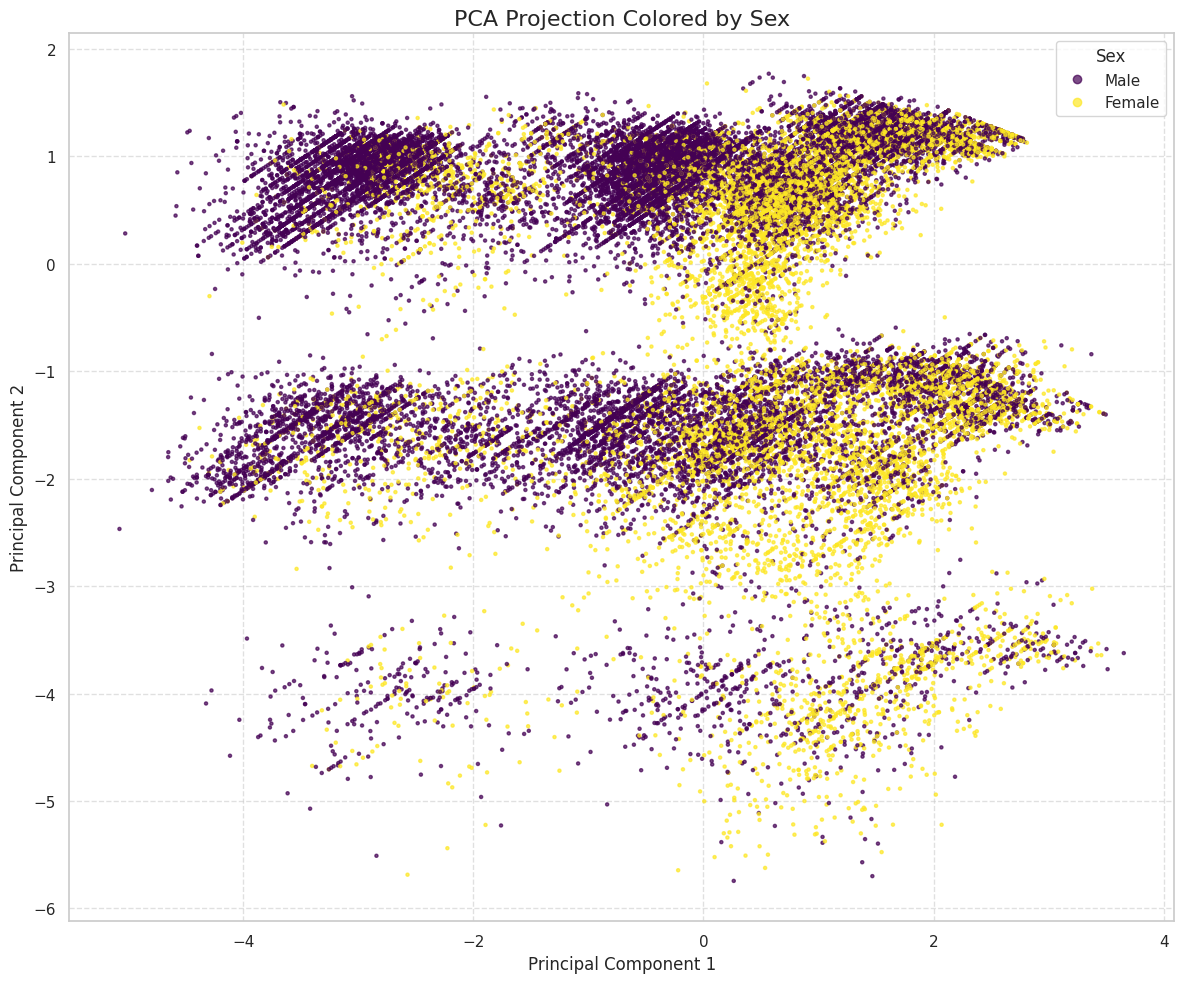

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure y_labels comes from the same DataFrame as PCA columns
y_labels = df_selected_umap['sex']
y_numeric, categories = pd.factorize(y_labels)

# Extract PCA components
pca_x = df_selected_umap['PCA1']
pca_y = df_selected_umap['PCA2']

# Ensure all are same length
assert len(pca_x) == len(pca_y) == len(y_numeric), "Mismatch in array lengths!"

# Plotting
fig, ax = plt.subplots(figsize=(12, 10))

scatter = ax.scatter(
    pca_x,
    pca_y,
    c=y_numeric,
    cmap='viridis',
    s=5,
    alpha=0.7
)

# Add legend
ax.legend(handles=scatter.legend_elements()[0], labels=list(categories), title="Sex")

ax.set_title('PCA Projection Colored by Sex', fontsize=16)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [ ]:


df_selected_umap.to_csv('female_adult_data.csv', index=False)
print("DataFrame 'df_selected_umap' saved as 'female_adult_data.csv'")


DataFrame 'df_selected_umap' saved as 'df_selected_umap.csv'
